# Poisson Random Experiment

This notebook explores the Poisson distribution as a random experiment.

**Poisson distribution** is used to model the number of events occurring in a fixed interval of time or space, under the following conditions:

1. Events occur independently.
2. The average rate (λ) is constant.
3. At most one event can occur in an infinitesimally small interval.
4. The probability of more than one event in a very small interval is negligible.

In [1]:
# Using Python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set random seed for reproducibility
np.random.seed(42)

## Simulating Poisson Data

For example, simulate 1000 samples from a Poisson distribution with λ = 3.

In [2]:
lambda_param = 3  # average rate
samples = np.random.poisson(lam=lambda_param, size=1000)

# Display first 10 samples
samples[:10]

array([4, 1, 3, 3, 2, 3, 2, 3, 0, 2])

## Histogram of Simulated Data

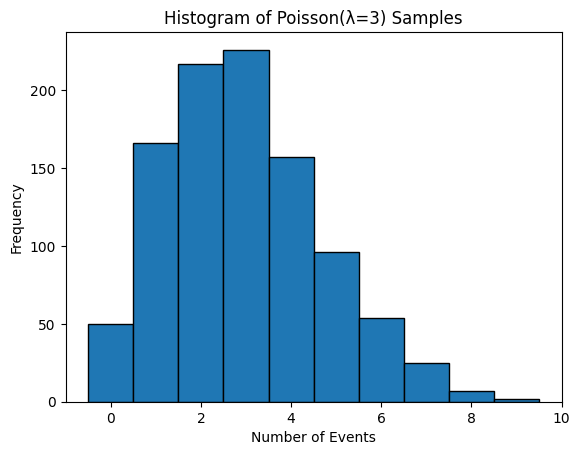

In [3]:
plt.figure()
plt.hist(samples, bins=range(0, max(samples)+2), align='left', edgecolor='black')
plt.title('Histogram of Poisson(λ=3) Samples')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.show()

## Probability Mass Function (PMF)

The PMF for a Poisson random variable gives the probability of exactly k events:

$$P(X = k) = \frac{e^{-\lambda} \lambda^{k}}{k!}$$

In [4]:
# Example: probability of exactly k=2 events
k = 2
pmf_k2 = poisson.pmf(k, mu=lambda_param)
pmf_k2

0.22404180765538775

## Cumulative Distribution Function (CDF)

The CDF gives the probability of up to k events:

$$F(k) = P(X \le k)$$

In [5]:
# Example: probability of up to k=2 events
cdf_k2 = poisson.cdf(k, mu=lambda_param)
cdf_k2

0.42319008112684364

## Probability of More Than k Events

In [6]:
# Probability of more than k events = 1 - CDF(k)
k = 5
prob_more_than_5 = 1 - poisson.cdf(k, mu=lambda_param)
prob_more_than_5

0.08391794203130343

## Expected Value and Variance

For a Poisson distribution, both the mean and variance are equal to λ.

In [7]:
# Using poisson.stats to get mean and variance
mean, var = poisson.stats(mu=lambda_param, moments='mv')
mean, var

(3.0, 3.0)

# Example: party sizes in tips dataset

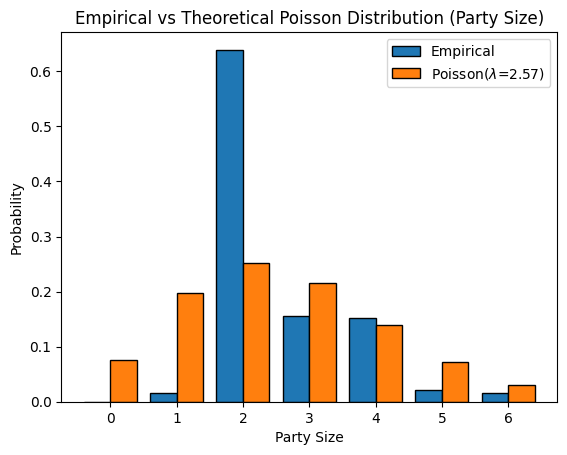

,k,Observed Count,Expected Count
0,0,0,18.7
1,1,4,48.0
2,2,156,61.7
3,3,38,52.8
4,4,37,33.9
5,5,5,17.4
6,6,4,7.5
7,>6,0,4.0


Estimated λ (mean party size): 2.57
Chi-square statistic: 222.15, p-value: 0.000


In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, chisquare
import pandas as pd
from IPython.display import display

# Load real dataset: party sizes in tips dataset
df = sns.load_dataset('tips').dropna(subset=['size'])
counts = df['size'].astype(int)

# Empirical frequency distribution up to 6 people
max_k = 6
obs_freq = counts.value_counts().sort_index()
obs_probs = obs_freq / obs_freq.sum()
k_values = np.arange(0, max_k + 1)
empirical_probs = [obs_probs.get(k, 0) for k in k_values]

# Estimate λ as the sample mean
lambda_est = counts.mean()

# Theoretical Poisson probabilities
theoretical_probs = poisson.pmf(k_values, mu=lambda_est)

# Plot empirical vs theoretical
plt.figure()
plt.bar(k_values - 0.2, empirical_probs, width=0.4, label='Empirical', align='center', edgecolor='black')
plt.bar(k_values + 0.2, theoretical_probs, width=0.4, label=f'Poisson($\\lambda$={lambda_est:.2f})', align='center', edgecolor='black')
plt.xlabel('Party Size')
plt.ylabel('Probability')
plt.title('Empirical vs Theoretical Poisson Distribution (Party Size)')
plt.legend()
plt.show()

# Goodness-of-fit test
# Combine tail beyond max_k
obs = [obs_freq.get(k, 0) for k in k_values] + [obs_freq[counts > max_k].sum()]
exp = [(poisson.pmf(k, mu=lambda_est) * len(counts)) for k in k_values] + \
      [(1 - poisson.cdf(max_k, mu=lambda_est)) * len(counts)]
chi2_stat, p_value = chisquare(f_obs=obs, f_exp=exp)

# Prepare results table
results_df = pd.DataFrame({
    'k': list(k_values) + [f'>{max_k}'],
    'Observed Count': obs,
    'Expected Count': np.round(exp, 1)
})

# Display table and statistics
display(results_df)
print(f"Estimated λ (mean party size): {lambda_est:.2f}")
print(f"Chi-square statistic: {chi2_stat:.2f}, p-value: {p_value:.3f}")
